In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df = pd.read_csv('Datasets/malaria-mosquito/Africa_Vectors_database_1898-2016_cluster.csv', encoding='latin1', sep=';')

df = df.loc[df['YeStart'] == df['YeEnd']]

pca = PCA(n_components=2)

X = df.iloc[:,9:35].values
y = df.iloc[:,7].values

scaler = StandardScaler()
ss = scaler.fit_transform(X)

X_pca = pca.fit_transform(X)

print(X.shape, X_pca.shape)

C:\Users\amaci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\amaci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(5296, 26) (5296, 2)


[0.36420684 0.18985992]


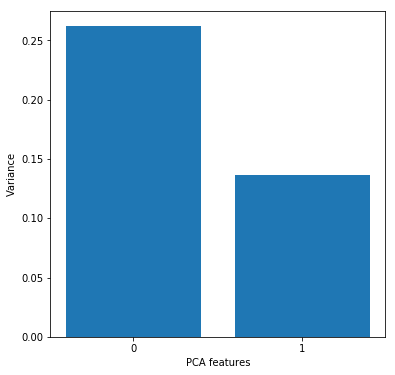

In [3]:
print(pca.explained_variance_)

features = range(pca.n_components_)

fig = plt.figure(figsize=(6,6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("Variance")
plt.savefig("variance_pca.png")
plt.show()

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.fit(X_test)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#pca = PCA(n_components=2)
#pca.fit(X_train)
#pca.fit(X_test)

#print(X_train.shape)
#print(X_test.shape)

In [5]:
#scaler = StandardScaler()

#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#pca = PCA(n_components=2)
#pca.fit(X_train)

In [6]:
print(pca.explained_variance_)

[0.36420684 0.18985992]


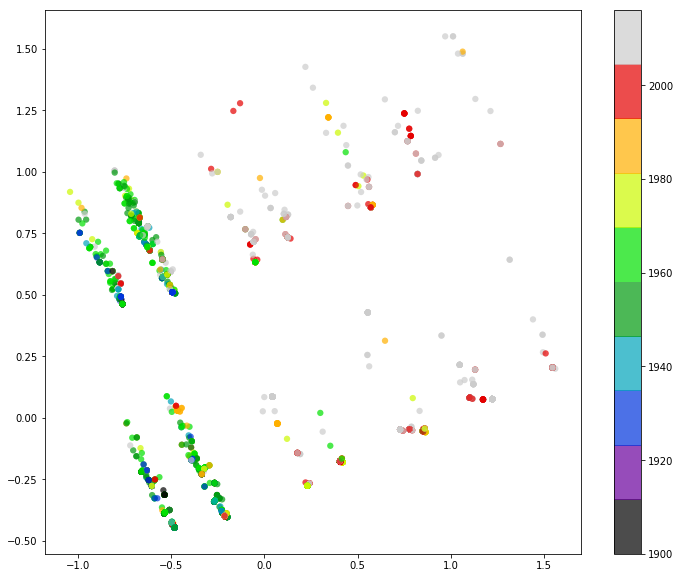

In [7]:
df_pca = pd.DataFrame(X_pca)
df_pca.columns = ['PC1','PC2']

#df_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()


In [8]:
df_partial = df['YeStart']
df_partial.reset_index(drop=True)

partial_dataset = df

partial_dataset = df_partial.where(df_partial >= 2000)
partial_dataset = partial_dataset.where(partial_dataset <= 2014)
partial_dataset.dropna(inplace=True)

values_dataset = df.loc[(df['YeStart'] >= 2000) & (df['YeEnd'] <= 2014)]

pca_partial = PCA(n_components=2)

W = values_dataset.iloc[:,9:35].values
z = partial_dataset.values

scaler = StandardScaler()
ss = scaler.fit_transform(W)

W_pca = pca_partial.fit_transform(W)

print(W.shape, W_pca.shape)

(2028, 26) (2028, 2)


C:\Users\amaci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\amaci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[0.51575135 0.25307997]


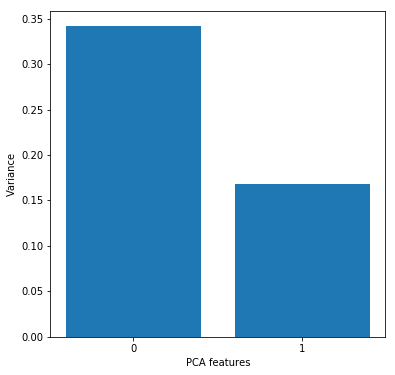

In [9]:
print(pca_partial.explained_variance_)

features = range(pca_partial.n_components_)

fig = plt.figure(figsize=(6,6))
plt.bar(features, pca_partial.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("Variance")
plt.savefig("variance_pca.png")
plt.show()

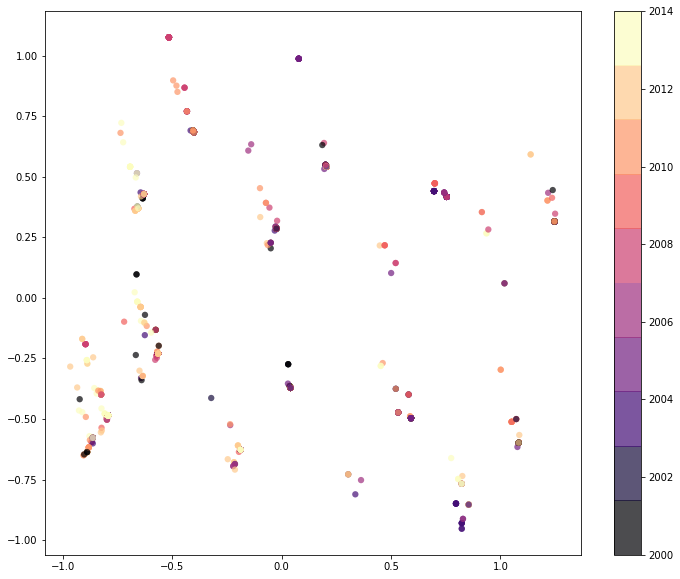

In [10]:
df_w_pca = pd.DataFrame(W_pca)
df_w_pca.columns = ['PC1','PC2']

#df_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))

plt.figure(figsize=(12,10))
plt.scatter(W_pca[:,0], W_pca[:,1], c=z, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('magma', 10))
plt.colorbar()